In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv(r'C:\Users\guru sai reddy\Desktop\Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:

X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.shape

(8000, 11)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
classifier=Sequential()

In [20]:
classifier.add(Dense(units= 6,  kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units= 6,  kernel_initializer= 'he_uniform',activation='relu'))
classifier.add(Dense(units= 6,  kernel_initializer= 'he_uniform',activation='relu'))
classifier.add(Dense(units= 1,  kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [21]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


C:\Users\guru sai reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 362us/step - loss: 0.5118 - accuracy: 0.7962 - val_loss: 0.4961 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 116us/step - loss: 0.4827 - accuracy: 0.7962 - val_loss: 0.4670 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 121us/step - loss: 0.4535 - accuracy: 0.7962 - val_loss: 0.4438 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 115us/step - loss: 0.4301 - accuracy: 0.8007 - val_loss: 0.4265 - val_accuracy: 0.8016
Epoch 5/100
5359/5359 [==============================] - 1s 112us/step - loss: 0.4140 - accuracy: 0.8140 - val_loss: 0.4131 - val_accuracy: 0.8148
Epoch 6/100
5359/5359 [==============================] - 1s 125us/step - loss: 0.4024 - accuracy: 0.8253 - val_loss: 0.4059 - val_accuracy: 0.8190
Epoch 7/100
5359/5359 [==============================] - 1s 123us/step

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


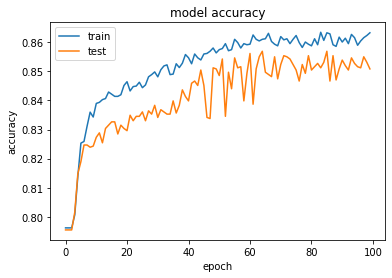

In [25]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

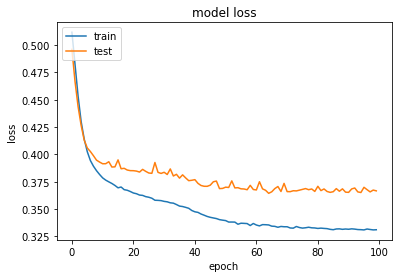

In [26]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1499,   96],
       [ 187,  218]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.8585